# The birthday problem: relaxed assumptions

There are two assumptions we used (equally likely birthdates and ignoring February 29 as a possible birth date). While relaxing these can complicate the mathematical calculation, the simulations can be easily modified to account for more complicated scenarios.

We use below a dataset from FiveThirtyEight that contains the number of daily births in US between 2000 and 2014 to estimate the odds of each day of the year to be a birthday:

https://github.com/fivethirtyeight/data/tree/master/births

Note that in the following dataset, the variable for day of week is coded 1 for Monday and 7 for Sunday. Also note that there are four leap years in this dataset &ndash; finding the correct probability for being born in a leap year is beyond the scope of this section.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plots


plots.style.use('fivethirtyeight')


birth_data = pd.read_csv(
    "https://raw.githubusercontent.com"
    "/fivethirtyeight/data/18a5be518548601fdc77176481da105573ef704f/births/US_births_2000-2014_SSA.csv",
    index_col=("year", "month", "date_of_month"),
)

birth_data

day_of_week  births
year month date_of_month                     
2000 1     1                        6    9083
           2                        7    8006
           3                        1   11363
           4                        2   13032
           5                        3   12558
...                               ...     ...
2014 12    27                       6    8656
           28                       7    7724
           29                       1   12811
           30                       2   13634
           31                       3   11990

[5479 rows x 2 columns]

This is an interesting dataset and we encourage you to use it to answer questions like: what is least frequent day of the week for giving birth?

The pandas library features commands that allow you to group rows by unique values in a column. We used it before and we will use it below. You will learn more about it in Section ???.

Below we'll sum births for each day of the year across the years of the dataset.

In [2]:
birth_counts = birth_data.groupby(['month', 'date_of_month']).sum()[['births']]

birth_counts

births
month date_of_month        
1     1              116030
      2              144083
      3              170115
      4              171663
      5              166682
...                     ...
12    27             182839
      28             182888
      29             181021
      30             178769
      31             158230

[366 rows x 1 columns]

We see that there were 116,030 birth on January 1<sup>st</sup>, 144,083 (much larger! why?) on January 2<sup>nd</sup>, _etc_.

A histogram of the counts in the above DataFrame:

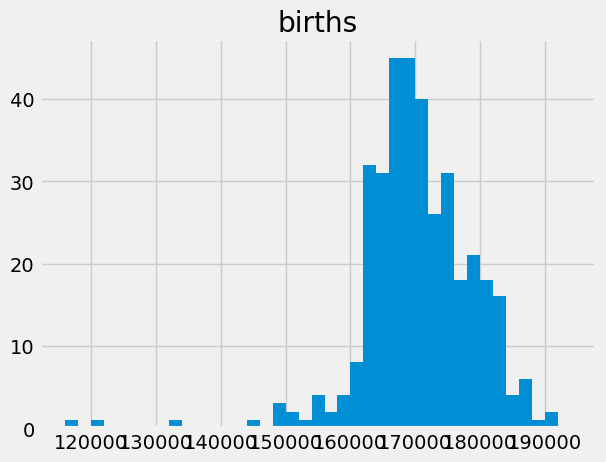

In [3]:
birth_counts.hist(bins=range(116000, 195000, 2000));

Note that some days of the year are outliers in number of births. Can you guess which?

We will use these counts to estimate the probability that a given date is a birthday for a random US subject.

In [4]:
bday_probs = birth_counts.births / sum(birth_counts.births)

bday_probs

month  date_of_month
1      1                0.001866
       2                0.002317
       3                0.002736
       4                0.002760
       5                0.002680
                          ...   
12     27               0.002940
       28               0.002941
       29               0.002911
       30               0.002875
       31               0.002544
Name: births, Length: 366, dtype: float64

These probabilities are added to the simulation when using the `random.choice` function. Look at the function below and compare it to the `birthday_sim` function introduced in Section 2.

In [5]:
from collections import Counter


# Adding February 29 -- the number of possible birthdays is now 366!

birthdays2 = range(1, 367)


def birthday_sim2(n, nrep, pr):
    '''Estimate birthday matching probabilities using nrep simulations.
       
       The 366 possible birthdays are weighted by given probabilities.
       
    '''
    return np.array([
        Counter(np.random.choice(birthdays2, n, p=pr)).most_common(1)[0][1]
        for _rep in range(nrep)
    ])

We calculate below the probability for the case $n=23$ using these relaxed assumptions. Do you think the probabililty will be higher or lower? 

In [6]:
n = 23
nrep = 10_000

sum(birthday_sim2(n, nrep, bday_probs) > 1) / nrep

0.514

**Note**: more accurate simulation experiments do not always lead to different results &ndash; but we do not know that before performing them!
